In [7]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from models_config.model_config_GSP import *
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 11,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/1j/5s36wz6s0jlb1k64vsq1k2zh0000gn/T/ipykernel_16329/2915192044.py:17: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


In [12]:
def get_best_student_ensamble(model, view, dataset, CV, runs, dataset_split, analysis_type, model_args):
    import warnings
    warnings.filterwarnings('ignore')
    
    student_rep = []
    student_var = []

    # get the best reproducibility across all runs 
    for run in runs:

        mean_all_runs = []

        for student in range(model_args["n_students"]):
            view_rep, _ = view_reproducibility_analysis(
                dataset=dataset, 
                models=[model], 
                CV=CV, 
                views=[view], 
                run=run, 
                students=[student], 
                model_args=[model_args]
            )
            mean_all_runs.append(view_rep[0][0])
        #store the reproducibility score for all students for the run 
        student_rep.append(mean_all_runs)
    
    #get the mean and variance for the reproducibility scores for all the students
    student_var = np.var(student_rep, axis=0)
    student_rep = np.mean(student_rep, axis=0)

    #get the metrics of all the student models
    all_student_metrics_mean, _ = get_student_model_metric_all_folds(
        dataset=dataset, 
        model=model, 
        CV=CV, 
        runs=runs, 
        analysis_type=analysis_type, 
        dataset_split=dataset_split, 
        view=view, 
        model_args=model_args
    )
    
    #get the best model based soley on max reproducibility 
    best_rep_max = 0
    metric = 0
    student_max = -1
    for i, rep in enumerate(student_rep):
        if rep > metric:
            best_rep_max = rep 
            metric = rep
            student_max = i

    #get the best model based on max reproducibility and accuracy
    best_rep_acc = 0
    metric = 0
    student_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if (rep+student_acc)/2 > metric:
            metric = (rep+student_acc)/2 
            best_rep_acc = rep
            student_acc_index = i
    
    #get the best model based on max reproducibility and f1 score
    best_rep_f1 = 0
    metric = 0
    student_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if (rep+student_f1)/2 > metric:
            metric = (rep+student_f1)/2 
            best_rep_f1 = rep
            student_f1_index = i
    
    return [best_rep_max, student_var[student_max], student_max], [best_rep_acc, student_var[student_acc_index], student_acc_index], [best_rep_f1, student_var[student_f1_index], student_f1_index]
    

In [13]:
def get_best_student_ensamble_detailed(model, view, CV, runs, dataset_split, analysis_type, model_args):
    import warnings
    warnings.filterwarnings('ignore')
    
    student_rep = []
    student_var = []

    # get the best reproducibility across all runs 
    for run in runs:

        mean_all_runs = []

        for student in range(model_args["n_students"]):
            view_rep, _ = view_reproducibility_analysis(
                dataset=dataset, 
                models=[model], 
                CV=CV, 
                views=[view], 
                run=run, 
                students=[student], 
                model_args=[model_args]
            )
            mean_all_runs.append(view_rep[0][0])
        #store the reproducibility score for all students for the run 
        student_rep.append(mean_all_runs)
    
    #get the mean and variance for the reproducibility scores for all the students
    student_var = np.var(student_rep, axis=0)
    student_rep = np.mean(student_rep, axis=0)

    #get the metrics of all the student models
    all_student_metrics_mean, all_student_metrics_var = get_student_model_metric_all_folds(
        dataset=dataset, 
        model=model, 
        CV=CV, 
        runs=runs, 
        analysis_type=analysis_type, 
        dataset_split=dataset_split, 
        view=view, 
        model_args=model_args
    )
    
    #get the best model based soley on max reproducibility 
    best_rep_max = 0
    metric = 0
    student_max = -1
    for i, rep in enumerate(student_rep):
        if rep > metric:
            best_rep_max = rep 
            metric = rep
            student_max = i

    #get the best model based on max accuracy
    best_max_acc = 0
    metric = 0
    student_max_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if student_acc > metric:
            metric = student_acc
            best_max_acc = rep
            student_max_acc_index = i

    #get the best model based on max reproducibility and f1 score
    best_max_f1 = 0
    metric = 0
    student_max_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if student_f1 > metric:
            metric = student_f1
            best_max_f1 = rep
            student_max_f1_index = i

    #get the best model based on max reproducibility and accuracy
    best_rep_acc = 0
    metric = 0
    student_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if (rep+student_acc)/2 > metric:
            metric = (rep+student_acc)/2 
            best_rep_acc = rep
            student_acc_index = i
    
    #get the best model based on max reproducibility and f1 score
    best_rep_f1 = 0
    metric = 0
    student_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if (rep+student_f1)/2 > metric:
            metric = (rep+student_f1)/2 
            best_rep_f1 = rep
            student_f1_index = i
    
    return all_student_metrics_mean, all_student_metrics_var, [[best_rep_max, student_var[student_max], student_max], [best_max_acc, student_var[student_max_acc_index], student_max_acc_index], [best_max_f1, student_var[student_max_f1_index], student_max_f1_index], [best_rep_acc, student_var[student_acc_index], student_acc_index], [best_rep_f1, student_var[student_f1_index], student_f1_index]]
    

# COMPARISON BETWEEN LSP AND LOGITS 

In [15]:
analysis_type="model_assessment"
dataset = "gender_data"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_args,
    gcn_student_ensamble_3_args,
    gcn_student_ensamble_4_args,
    gcn_student_ensamble_5_args,
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args,
    gcn_student_emb_ensamble_2_args,
    gcn_student_emb_ensamble_3_args,
    gcn_student_emb_ensamble_4_args,
    gcn_student_emb_ensamble_5_args
]

all_model_data_mean = []
all_model_data_std = []

for model_arg in models_args:
    
    model_data_mean = []
    model_data_std = []
    
    print(model_arg["model_name"])
    
    for view in [0,2,4,5]:
        
        rep = get_best_student_ensamble(
            model=model_arg["model_name"], 
            dataset=dataset,
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )[1]
        model_data_mean.append(rep[0])
        model_data_std.append(rep[1])
    
    all_model_data_mean.append(model_data_mean)
    all_model_data_std.append(model_data_std)

gcn_student_ensamble_2
gcn_student_ensamble_3
gcn_student_ensamble_4
gcn_student_ensamble_5
gcn_student_lsp_ensamble_2
gcn_student_lsp_ensamble_3
gcn_student_lsp_ensamble_4
gcn_student_lsp_ensamble_5
gcn_student_emb_ensamble_2
gcn_student_emb_ensamble_3
gcn_student_emb_ensamble_4
gcn_student_emb_ensamble_5


In [16]:
df = pd.DataFrame(all_model_data_mean)

df_transposed = df.T
# Calculate the mean along each column
mean_row = df_transposed.mean()

# Add the mean row to the transposed DataFrame
df_transposed = df_transposed.append(mean_row, ignore_index=True)
print(df_transposed.head())

         0         1         2         3         4         5         6   \
0  0.940556  0.968750  0.972222  0.965278  0.938333  0.968333  0.960000   
1  0.929722  0.932083  0.953056  0.941667  0.944444  0.931944  0.968889   
2  0.943889  0.957778  0.961111  0.975556  0.957917  0.966667  0.965000   
3  0.946111  0.912639  0.955278  0.937778  0.933056  0.921667  0.969028   
4  0.940069  0.942813  0.960417  0.955069  0.943437  0.947153  0.965729   

         7         8         9         10        11  
0  0.958056  0.885833  0.914722  0.934306  0.928750  
1  0.978333  0.898750  0.928333  0.935556  0.938750  
2  0.977222  0.869583  0.913750  0.921667  0.907500  
3  0.933750  0.916806  0.941250  0.929444  0.959722  
4  0.961840  0.892743  0.924514  0.930243  0.933681  


In [36]:
df = pd.DataFrame(np.sqrt(all_model_data_std))

df_transposed_var = df.T
# Calculate the mean along each column
std_row = df_transposed_var.mean()

# Add the mean row to the transposed DataFrame
df_std_transposed = df_transposed_var.append(std_row, ignore_index=True)
df_std_transposed

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.022229,0.004270,0.017213,0.024256,0.018584,0.007265,0.019173,0.020230,0.060816,0.050186,0.054013,0.043444
1,0.018934,0.028467,0.022608,0.015726,0.019355,0.014055,0.007713,0.008498,0.083801,0.043133,0.048759,0.038871
2,0.026074,0.010323,0.011785,0.014530,0.017624,0.008607,0.011055,0.009027,0.066363,0.041156,0.060385,0.055064
3,0.019011,0.018028,0.011749,0.019343,0.018276,0.009091,0.013945,0.019355,0.057091,0.051333,0.028190,0.031975
4,0.021562,0.015272,0.015839,0.018464,0.018460,0.009754,0.012972,0.014278,0.067018,0.046452,0.047837,0.042339


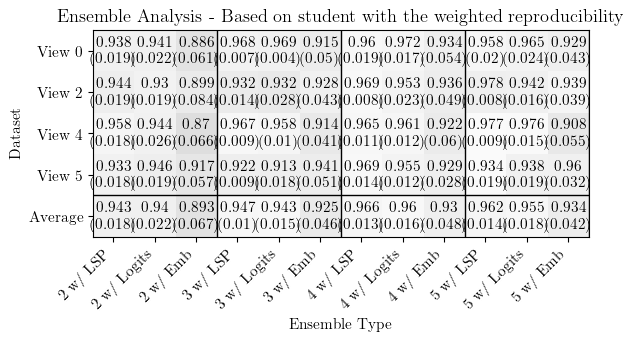

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 8, 5, 1, 9, 6, 2, 10, 7, 3, 11]
df_ordered = df_transposed.iloc[:, column_order]
df_std_ordered = df_std_transposed.iloc[:, column_order]

# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df.shape[0], 2):
    pair_max = max(df.iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')



plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

# Add vertical lines spaced 2 cells apart
for j in range(2, df_ordered.shape[1], 3):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2 w/ LSP', '2 w/ Logits', '2 w/ Emb', '3 w/ LSP', '3 w/ Logits', '3 w/ Emb', '4 w/ LSP', '4 w/ Logits', '4 w/ Emb', '5 w/ LSP', '5 w/ Logits', '5 w/ Emb']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Based on student with the weighted reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')
if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Based on student with the average reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()


In [38]:
df_ordered*100

,4,0,8,5,1,9,6,2,10,7,3,11
0,93.833333,94.055556,88.583333,96.833333,96.875000,91.472222,96.000000,97.222222,93.430556,95.805556,96.527778,92.875000
1,94.444444,92.972222,89.875000,93.194444,93.208333,92.833333,96.888889,95.305556,93.555556,97.833333,94.166667,93.875000
2,95.791667,94.388889,86.958333,96.666667,95.777778,91.375000,96.500000,96.111111,92.166667,97.722222,97.555556,90.750000
3,93.305556,94.611111,91.680556,92.166667,91.263889,94.125000,96.902778,95.527778,92.944444,93.375000,93.777778,95.972222
4,94.343750,94.006944,89.274306,94.715278,94.281250,92.451389,96.572917,96.041667,93.024306,96.184028,95.506944,93.368056


In [39]:
df_std_ordered*100

,4,0,8,5,1,9,6,2,10,7,3,11
0,1.858414,2.222917,6.081621,0.726483,0.426956,5.018561,1.917270,1.721326,5.401349,2.023016,2.425590,4.344381
1,1.935495,1.893377,8.380066,1.405457,2.846680,4.313255,0.771302,2.260777,4.875851,0.849837,1.572576,3.887128
2,1.762357,2.607415,6.636346,0.860663,1.032272,4.115637,1.105542,1.178511,6.038457,0.902671,1.452966,5.506450
3,1.827643,1.901104,5.709144,0.909059,1.802829,5.133274,1.394503,1.174905,2.819000,1.935545,1.934299,3.197462
4,1.845977,2.156203,6.701794,0.975416,1.527185,4.645182,1.297154,1.583880,4.783664,1.427767,1.846358,4.233855


In [26]:
analysis_type="model_assessment"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_args,
    gcn_student_ensamble_3_args,
    gcn_student_ensamble_4_args,
    gcn_student_ensamble_5_args,
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args,
    gcn_student_emb_ensamble_2_args,
    gcn_student_emb_ensamble_3_args,
    gcn_student_emb_ensamble_4_args,
    gcn_student_emb_ensamble_5_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_ensamble_2
[[0.9405555555555555, 0.000494135802469136, 0], [0.9405555555555555, 0.000494135802469136, 0], [0.9156944444444445, 0.0005571180555555544, 1], [0.9405555555555555, 0.000494135802469136, 0], [0.9156944444444445, 0.0005571180555555544, 1]]
[[0.9297222222222221, 0.0003584876543209886, 0], [0.8902777777777778, 0.0001358024691358015, 1], [0.8902777777777778, 0.0001358024691358015, 1], [0.9297222222222221, 0.0003584876543209886, 0], [0.8902777777777778, 0.0001358024691358015, 1]]
[[0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1]]
[[0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1]]
gcn_student_ensamble_3
[[0.9687

In [49]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(60, 5)

In [50]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(12):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [51]:
all_data_var = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(12):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [52]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(60, 5)

In [53]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(60, 5)

In [54]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

In [55]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
new_labels = ['2 w/ Logits', '3 w/ Logits', '4 w/ Logits','5 w/ Logits', '2 w/ LSP', '3 w/ LSP', '4 w/ LSP',  '5 w/ LSP', '2 w/ Emb', '3 w/ Emb', '4 w/ Emb', '5 w/ Emb']
# Rename the columns using the new labels
df_acuracy.columns = new_labels
df_var.columns = new_labels

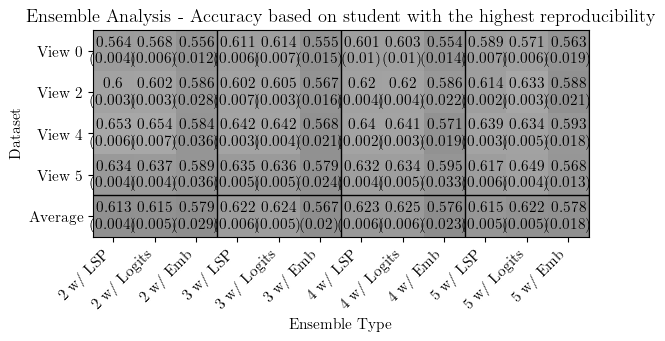

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 8, 5, 1, 9, 6, 2, 10, 7, 3, 11]
df_ordered = df_acuracy.iloc[:, column_order]
df_std_ordered = df_var.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df_ordered.T.shape[0], 2):
    pair_max = max(df_ordered.iloc[4].iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

# Add vertical lines spaced 2 cells apart
for j in range(2, df_ordered.shape[1], 3):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2 w/ LSP', '2 w/ Logits', '2 w/ Emb', '3 w/ LSP', '3 w/ Logits', '3 w/ Emb', '4 w/ LSP', '4 w/ Logits', '4 w/ Emb','5 w/ LSP', '5 w/ Logits', '5 w/ Emb']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Accuracy based on student with the highest reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Accuracy based on student with the weighted reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()

In [57]:
df_ordered*100

,2 w/ LSP,2 w/ Logits,2 w/ Emb,3 w/ LSP,3 w/ Logits,3 w/ Emb,4 w/ LSP,4 w/ Logits,4 w/ Emb,5 w/ LSP,5 w/ Logits,5 w/ Emb
0,56.387557,56.778634,55.599638,61.133945,61.354159,55.499397,60.130316,60.327069,55.378442,58.920296,57.110477,56.259082
1,60.037766,60.214470,58.570733,60.162045,60.474145,56.700481,61.953215,62.048395,58.580349,61.428053,63.254717,58.754880
2,65.347478,65.388880,58.411403,64.189036,64.230411,56.819584,64.023050,64.092642,57.078241,63.883251,63.364842,59.312146
3,63.360231,63.747548,58.861465,63.470824,63.574188,57.856217,63.190064,63.421384,59.458089,61.735141,64.913467,56.770380
4,61.283258,61.532383,57.860810,62.238962,62.408226,56.718920,62.324161,62.472372,57.623781,61.491685,62.160876,57.774122


In [59]:
df_std_ordered*100

,2 w/ LSP,2 w/ Logits,2 w/ Emb,3 w/ LSP,3 w/ Logits,3 w/ Emb,4 w/ LSP,4 w/ Logits,4 w/ Emb,5 w/ LSP,5 w/ Logits,5 w/ Emb
0,0.421290,0.564662,1.159347,0.599942,0.741391,1.547037,0.960210,1.026597,1.431280,0.725066,0.605979,1.895219
1,0.308422,0.258683,2.753932,0.732203,0.336844,1.635694,0.414608,0.357395,2.206614,0.237379,0.336649,2.120590
2,0.571642,0.662559,3.556915,0.291194,0.416586,2.128846,0.240506,0.268195,1.927012,0.288252,0.534694,1.788582
3,0.375402,0.420181,3.589633,0.535064,0.492942,2.439152,0.394778,0.466891,3.265889,0.581666,0.374800,1.266185
4,0.430207,0.500324,2.935359,0.562836,0.519534,1.971691,0.571751,0.606537,2.307440,0.500873,0.476161,1.795203


## HOW TO PICK THE BEST STUDENT 

In [96]:
def get_best_student_ensamble_detailed(model, view, CV, runs, dataset_split, analysis_type, model_args):
    import warnings
    warnings.filterwarnings('ignore')
    
    student_rep = []
    student_var = []

    # get the best reproducibility across all runs 
    for run in runs:

        mean_all_runs = []

        for student in range(model_args["n_students"]):
            view_rep, _ = view_reproducibility_analysis(
                dataset=dataset, 
                models=[model], 
                CV=CV, 
                views=[view], 
                run=run, 
                students=[student], 
                model_args=[model_args]
            )
            mean_all_runs.append(view_rep[0][0])
        #store the reproducibility score for all students for the run 
        student_rep.append(mean_all_runs)
    
    #get the mean and variance for the reproducibility scores for all the students
    student_var = np.var(student_rep, axis=0)
    student_rep = np.mean(student_rep, axis=0)

    #get the metrics of all the student models
    all_student_metrics_mean, all_student_metrics_var = get_student_model_metric_all_folds(
        dataset=dataset, 
        model=model, 
        CV=CV, 
        runs=runs, 
        analysis_type=analysis_type, 
        dataset_split=dataset_split, 
        view=view, 
        model_args=model_args
    )
    
    #get the best model based soley on max reproducibility 
    best_rep_max = 0
    metric = 0
    student_max = -1
    for i, rep in enumerate(student_rep):
        if rep > metric:
            best_rep_max = rep 
            metric = rep
            student_max = i

    #get the best model based on max accuracy
    best_max_acc = 0
    metric = 0
    student_max_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if student_acc > metric:
            metric = student_acc
            best_max_acc = rep
            student_max_acc_index = i

    #get the best model based on max reproducibility and f1 score
    best_max_f1 = 0
    metric = 0
    student_max_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if student_f1 > metric:
            metric = student_f1
            best_max_f1 = rep
            student_max_f1_index = i

    #get the best model based on max reproducibility and accuracy
    best_rep_acc = 0
    metric = 0
    student_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if (rep+student_acc)/2 > metric:
            metric = (rep+student_acc)/2 
            best_rep_acc = rep
            student_acc_index = i
    
    #get the best model based on max reproducibility and f1 score
    best_rep_f1 = 0
    metric = 0
    student_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if (rep+student_f1)/2 > metric:
            metric = (rep+student_f1)/2 
            best_rep_f1 = rep
            student_f1_index = i
    
    return all_student_metrics_mean, all_student_metrics_var, [[best_rep_max, student_var[student_max], student_max], [best_max_acc, student_var[student_max_acc_index], student_max_acc_index], [best_max_f1, student_var[student_max_f1_index], student_max_f1_index], [best_rep_acc, student_var[student_acc_index], student_acc_index], [best_rep_f1, student_var[student_f1_index], student_f1_index]]
    

In [97]:
from models.model_config import *

analysis_type="model_assessment"
dataset_split="val"
models_args=[
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)


gcn_student_lsp_ensamble_2
[[0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1]]
[[0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1], [0.8927777777777777, 0.0002483796296296277, 1], [0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1]]
[[0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1]]
[[0.9577777777777777, 0.0002234567901234572, 0], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1]]

In [98]:
#Model, view, how to pick, [rep, std, index]
df_best_student = np.array(all_model_best_student)

In [99]:
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df

,0,1,2,3,4
max rep,0.938472,0.944444,0.957917,0.957778,0.949653
max acc,0.938333,0.892778,0.957917,0.933056,0.930521
max f1,0.938472,0.892778,0.957917,0.933056,0.930556
weighted acc,0.938333,0.944444,0.957917,0.933056,0.943437
weighted f1,0.938472,0.892778,0.957917,0.933056,0.930556
max rep,0.969028,0.931944,0.966667,0.956111,0.955937
max acc,0.968333,0.896667,0.932222,0.921667,0.929722
max f1,0.968333,0.896667,0.966667,0.921667,0.938333
weighted acc,0.968333,0.931944,0.966667,0.921667,0.947153
weighted f1,0.968333,0.896667,0.966667,0.921667,0.938333


In [100]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())


In [101]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy

,0,1,2,3,4
max rep,0.535898,0.600378,0.653475,0.600888,0.597660
max acc,0.563971,0.636689,0.653475,0.633602,0.621934
max f1,0.535898,0.636689,0.653475,0.633602,0.614916
weighted acc,0.563971,0.600378,0.653475,0.633602,0.612857
weighted f1,0.535898,0.636689,0.653475,0.633602,0.614916
max rep,0.533604,0.601620,0.641890,0.588522,0.591409
max acc,0.611339,0.625489,0.653350,0.634708,0.631222
max f1,0.611339,0.625489,0.641890,0.634708,0.628357
weighted acc,0.611339,0.601620,0.641890,0.634708,0.622390
weighted f1,0.611339,0.625489,0.641890,0.634708,0.628357


In [102]:
max_value = df_acuracy[:5][4].values.max()
max_indices_acc = np.where(df_acuracy[:5][4].values == max_value)

max_value = df[:5][4].values.max()
max_indices_rep = np.where(df[:5][4].values == max_value)

max_indices_acc, max_indices_rep

((array([1]),), (array([0]),))

In [103]:
max_value = df_acuracy[5:10][4].values.max()
max_indices_acc = np.where(df_acuracy[5:10][4].values == max_value)

max_value = df[5:10][4].values.max()
max_indices_rep = np.where(df[5:10][4].values == max_value)

max_indices_acc, max_indices_rep

((array([1]),), (array([0]),))

In [104]:
max_value = df_acuracy[10:15][4].values.max()
max_indices_acc = np.where(df_acuracy[10:15][4].values == max_value)

max_value = df[10:15][4].values.max()
max_indices_rep = np.where(df[10:15][4].values == max_value)

max_indices_acc, max_indices_rep

((array([1]),), (array([0, 2, 3, 4]),))

In [105]:
ensamble_4_acc = df_acuracy[10:15]
ensamble_4_rep = df[10:15]
ensamble_4_acc

,0,1,2,3,4
max rep,0.601303,0.619532,0.640231,0.631901,0.623242
max acc,0.601303,0.623435,0.646875,0.631901,0.625879
max f1,0.601303,0.619532,0.640231,0.631901,0.623242
weighted acc,0.601303,0.619532,0.640231,0.631901,0.623242
weighted f1,0.601303,0.619532,0.640231,0.631901,0.623242


In [106]:
ensamble_4_rep

,0,1,2,3,4
max rep,0.96,0.968889,0.965000,0.969028,0.965729
max acc,0.96,0.930694,0.914306,0.969028,0.943507
max f1,0.96,0.968889,0.965000,0.969028,0.965729
weighted acc,0.96,0.968889,0.965000,0.969028,0.965729
weighted f1,0.96,0.968889,0.965000,0.969028,0.965729


In [107]:
max_value = df_acuracy[15:20][4].values.max()
max_indices_acc = np.where(df_acuracy[15:20][4].values == max_value)

max_value = df[15:20][4].values.max()
max_indices_rep = np.where(df[15:20][4].values == max_value)

max_indices_acc, max_indices_rep

((array([1]),), (array([0]),))

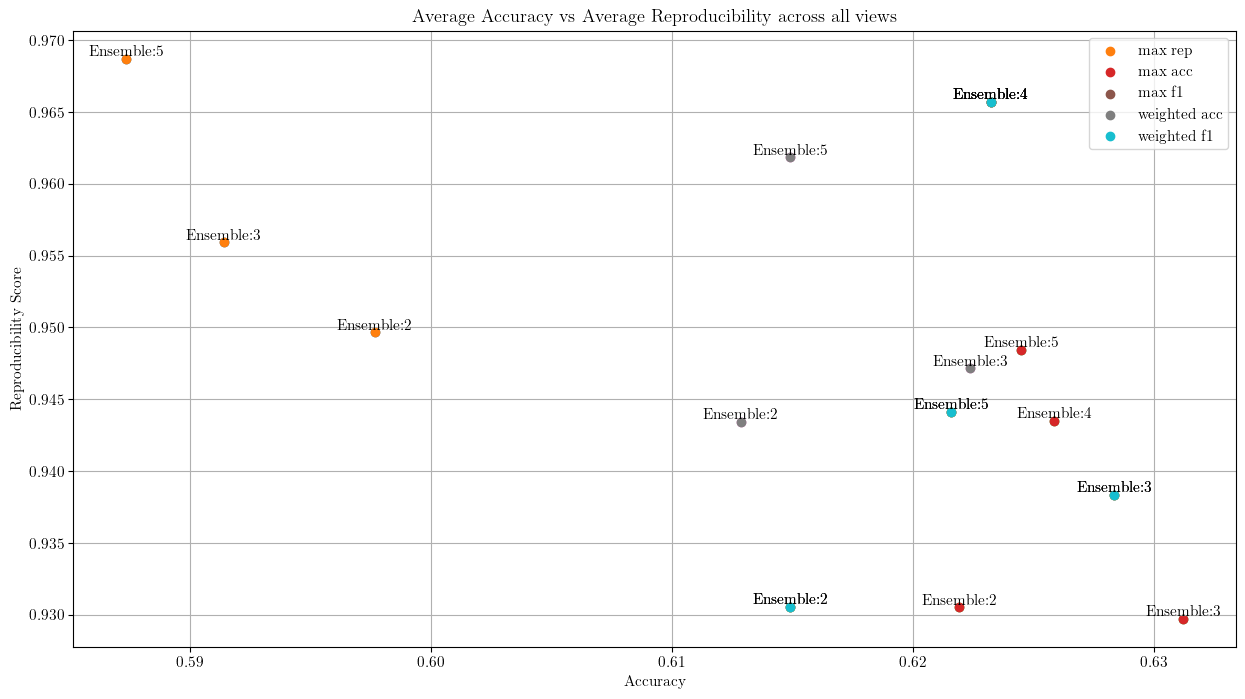

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (15,8)
all_x = []
all_y = []

for method in ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1']:
    # Assuming you have two DataFrames: df1 and df2
    # Let's say you want to plot column 'A' from df1 against column 'B' from df2
    labels = ["2", "3", "4", "5"]
    # Extract the columns of interest from the DataFrames
    x, y = df_acuracy.loc[method][4], df.loc[method][4]
    plt.scatter(x, y)

    # Create the scatter plot
    plt.scatter(x, y, label=method)

    # Add labels to each point
    for index, (i, j) in enumerate(zip(x, y)):
        plt.text(i, j, f'Ensemble:{labels[index]}', ha='center', va='bottom')
    # Customize the plot
    plt.xlabel('Accuracy')  # Add x-axis label
    plt.ylabel('Reproducibility Score')  # Add y-axis label
    plt.title(f'Average Accuracy vs Average Reproducibility across all views')  # Add title
    plt.grid()
    plt.legend()
    all_x.append(x)
    all_y.append(y)

if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Average Accuracy vs Average Reproducibility across all views'+".png", dpi=150,bbox_inches='tight')

plt.show()  # Show the plot

In [109]:
x = sum([x.tolist() for x in all_x], [])
y = sum([y.tolist() for y in all_y], [])
correlation_coefficient = np.corrcoef(x, y)[0, 1]
correlation_coefficient

-0.32042291884733676